# Template: Find the minimum of a function f(x)

### The model should automatically set the optimal learning rate gamma




### Find the minimum of
## $$f(x) = x^4+150*(x+1000)^2+10000 $$  <br><br><br>

## Type your code in cells 3, 5, 6 and 8
### to generate the results in cell 7 and 9

In [ ]:
#import python packages
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#define the x's range for plotting
x=np.arange(-100, 80, 0.1)

In [ ]:
#define f(x) based on the function
def f(x):

    return (x**4)+(150*(x+1000)**2)+10000

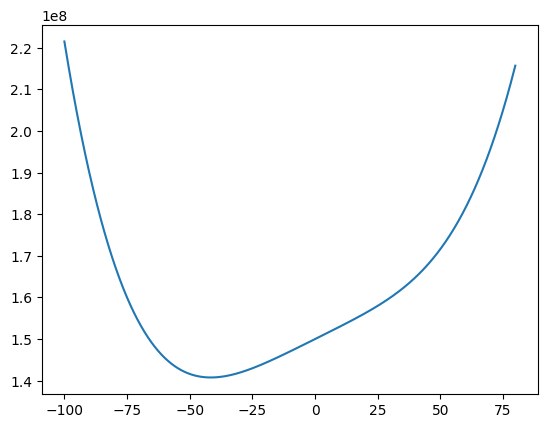

In [ ]:
#plot x vs. f(x)
plt.plot(x,f(x))

### We can see that the minimun is between f(-25) and f(-50)

In [ ]:
#define the derivative of f(x) over x ---> f'(x)
def derivative(x):

    return 4*(x**3) + 300*(x+1000)

In [ ]:
#define a function to find the minimum of f(x)
def find_optimum(x_old,x_new,gamma,precisions):
    #store each update in x_search
    x_search = [x_new]
    while np.abs(x_new-x_old) > precisions:
        x_old = x_new
        x_new = x_old - gamma * derivative(x_old)
        x_new
        x_search.append(x_new)

    print(len(x_search),"iteration")
    print("The local minimum occures at %f" % x_new)
    print("gamma",gamma)
    print("The minimum value is %f" % f(x_new))
    x_search=np.array(x_search)
    y_search=f(x_search)
    plt.plot(y_search)

1490 iteration
The local minimum occures at -41.578857
gamma 1e-06
The minimum value is 140784417.208193


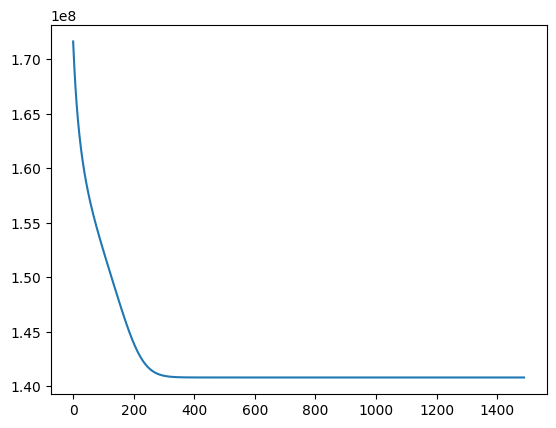

In [ ]:
#Test the find_optimum() function with the following parameters


x_old = 70 # This value doesn't matter, it's just a init value
x_new = 50 # This value doesn't matter
gamma = 0.000001  #the learning rate is critial, but we have to guess a value now
precision = 1e-12 #the precision decides when to stop the search
find_optimum(x_old,x_new,gamma,precision)  #call the function

###################################################
#the results should be similar to what's shown below
###################################################

In [ ]:
def adaptive_optimum(x_old, x_new, gamma, t, prec):
    nextIter = True
    while nextIter:
        x_old_try = x_old
        x_new_try = x_new
        gamma *= t
        if f(x_old_try-gamma*derivative(x_old_try))>(f(x_old_try)+t*gamma*(derivative(x_old_try)**2)):
            continue
        else:
            nextIter = False
        for i in range(10000):
            try:
                if abs(x_new_try-x_old_try)>precision:
                    x_old_try=x_new_try
                    x_new_try=x_old_try-(gamma*derivative(x_old_try))
                else:
                    print("Found gamma:             %.2E" % gamma)
                    print("The minimum is at:       x=%.2E" % x_new_try)
                    print("The minimum of f(x) is:  %.2E"% (f(x_new_try)))
                    return
            except OverflowError:
                break
        nextIter = True

In [ ]:
#Idealy, we want to automatically find the right gamma
#read http://www.onmyphd.com/?p=gradient.descent
#use backtracking method and create t

x_old = 70 # This value does not matter
x_new = 50 # This value does not matter either

#the precision is set to be very high
precision = 1e-12

#decrease rate of gamma
t=0.9

#we can start with a large positive gamma close to 1
gamma = 1

#call the function
adaptive_optimum(x_old, x_new, gamma, t, precision)

#hints
#1. We can simply create a list of gamma and try them because f(x)
    #may increase too fast and generate "value too large" error
#2. Use try and exception to eleminate the gamma that create errors
#3. Set a fixed number of updates, say 10000. See if updates converge into precision

####################################################
# the output should show the best gamma found
# and the minimum f(x) value and the corresponding x
#####################################################

Found gamma:             9.40E-05
The minimum is at:       x=-4.16E+01
The minimum of f(x) is:  1.41E+08
